In [1]:
from datetime import datetime

# print date as date accessed
date_accessed = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Date accessed: {date_accessed}")

Date accessed: 2024-10-15 22:39:51


In [2]:
import xarray as xr
import dask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, glob, re, time, math, calendar

# import custom functions
sys.path.append('/')
from libraries import *

In [3]:
station_id = 'PROF_OWEG'

In [6]:
ChSh_Coeff

<xarray.Dataset> Size: 2MB
Dimensions:                 (time: 31605, coeff: 5)
Coordinates:
  * time                    (time) datetime64[ns] 253kB 2018-01-04T17:00:00 ....
  * coeff                   (coeff) int64 40B 0 1 2 3 4
Data variables:
    Chebyshev_Coefficients  (time, coeff) float64 1MB ...

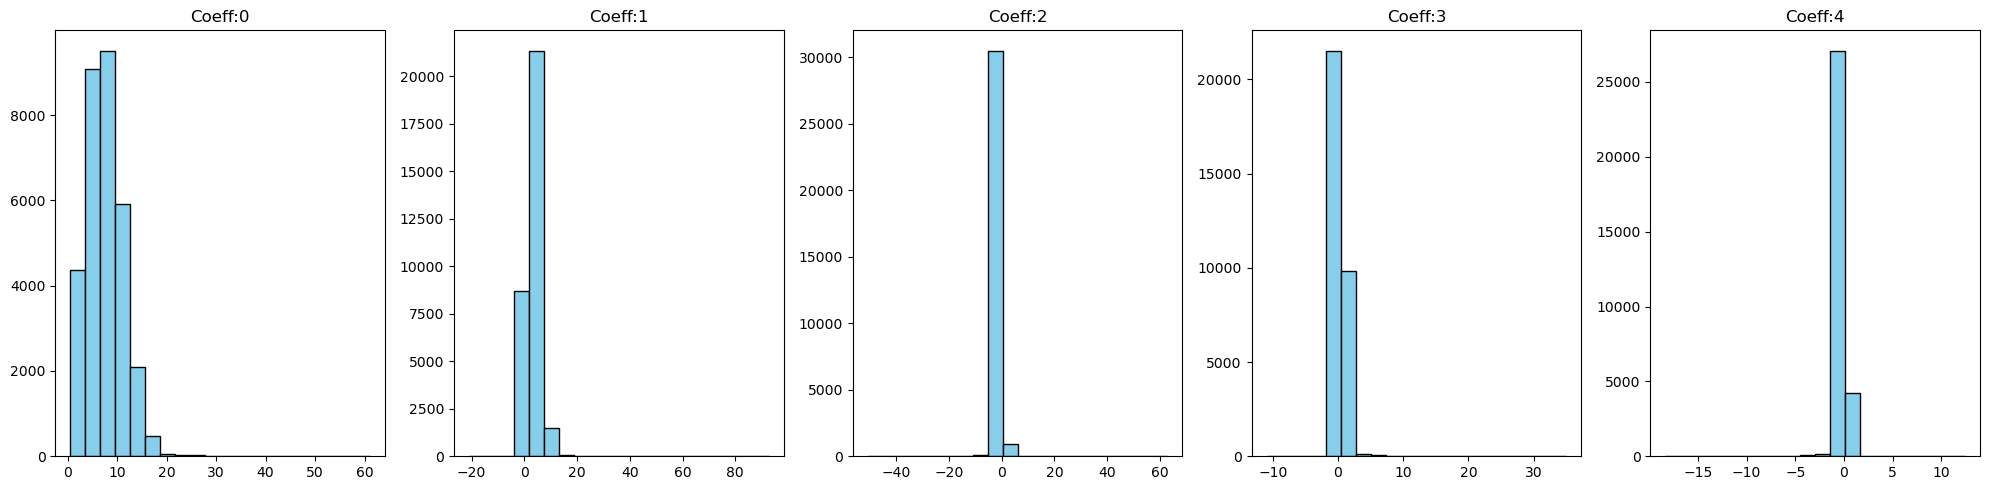

In [7]:
ChSh_Coeff = xr.open_dataset(f'data/Profiler_Chebyshev_Coefficients/{station_id}.nc')
# Calculate the number of rows and columns for the subplot grid
num_rows, num_cols = 1, 5

# Create a figure and axis
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))

# Flatten the axis array for easier iteration
axs_flat = axs.flatten()

# Loop through all variables and plot histograms
for i in range(5):
    row = i // num_cols
    col = i % num_cols
    axs_flat[i].hist(ChSh_Coeff.Chebyshev_Coefficients.sel(coeff=i).values.flatten(), bins=20, color='skyblue', edgecolor='black')
    axs_flat[i].set_title(f'Coeff:{i}')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('data/Figures/Histograms_of_targets.png')

# Checking the data processing script for Profiler Chebyshev coefficients

In [4]:
input_times_freq = 1
for year in range(2018,2024):
    dates_range = (f'{year}-01-01T00', f'{year}-12-31T23')
    input_variables = ['10ws','100ws','100alpha']
    target_variables = [0,1,2,3,4]

    X_train, Y_train, X_valid, Y_valid = data_processing('data/ERA5.nc',f'data/Profiler_Chebyshev_Coefficients/{station_id}.nc',
                                                        1,input_variables,target_variables,dates_range,station_id,val_arg=True)
    print(year, X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape)

2018 (4348, 3) (4348, 5) (1081, 3) (1081, 5)
2019 (4237, 3) (4237, 5) (1051, 3) (1051, 5)
2020 (4582, 3) (4582, 5) (1139, 3) (1139, 5)
2021 (4609, 3) (4609, 5) (1146, 3) (1146, 5)
2022 (1779, 3) (1779, 5) (441, 3) (441, 5)
2023 (5759, 3) (5759, 5) (1432, 3) (1432, 5)


In [6]:
input_times_freq = 1
for year in range(2018,2024):
    dates_range = (f'{year}-01-01T00', f'{year}-12-31T23')
    input_variables = ['10ws','100ws','100alpha']
    target_variables = [0,1,2,3,4]
    X_test, Y_test = data_processing('data/ERA5.nc',f'data/Profiler_Chebyshev_Coefficients/{station_id}.nc',
                                    input_times_freq,input_variables,target_variables,dates_range,station_id)
    print(year, X_test.shape, Y_test.shape)

2018 (5429, 3) (5429, 5)
2019 (5288, 3) (5288, 5)
2020 (5721, 3) (5721, 5)
2021 (5755, 3) (5755, 5)
2022 (2220, 3) (2220, 5)
2023 (7191, 3) (7191, 5)


# Checking the data processing script for NOW23 Chebyshev coefficients

In [7]:
input_times_freq = 12
for year in range(2018,2021):
    dates_range = (f'{year}-01-01T00', f'{year}-12-31T23')
    input_variables = ['10ws','100ws','100alpha']
    target_variables = [0,1,2,3,4]

    X_train, Y_train, X_valid, Y_valid = data_processing('data/ERA5.nc',f'data/NOW23_Chebyshev_Coefficients/{station_id}.nc',
                                                        input_times_freq,input_variables,target_variables,dates_range,station_id,val_arg=True)
    print(year, X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape)

2018 (7014, 3) (7014, 5) (1746, 3) (1746, 5)
2019 (7014, 3) (7014, 5) (1746, 3) (1746, 5)
2020 (7033, 3) (7033, 5) (1751, 3) (1751, 5)


In [8]:
input_times_freq = 12
for year in range(2018,2021):
    dates_range = (f'{year}-01-01T00', f'{year}-12-31T23')
    input_variables = ['10ws','100ws','100alpha']
    target_variables = [0,1,2,3,4]

    X_test, Y_test = data_processing('data/ERA5.nc',f'data/NOW23_Chebyshev_Coefficients/{station_id}.nc',
                                    input_times_freq,input_variables,target_variables,dates_range,station_id)
    print(year, X_test.shape, Y_test.shape)

2018 (8760, 3) (8760, 5)
2019 (8760, 3) (8760, 5)
2020 (8784, 3) (8784, 5)
